## Observations and Insights 

<!-- Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook. -->

- The first observation that can be made from the data provided is that the drug regimen 'Capomulin' had the lowest tumor volume (mm3) of all the drug regimens.
- The second is that there are more male than female mice in this study.
- The last observation is that r-squared value 0.3453212933918933 meaning that there is a 34% variance.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# print columns to see which column to merge
print(mouse_metadata.columns)
print(study_results.columns)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [3]:
# Checking the number of mice.
len(combined_df['Mouse ID'].value_counts())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
# duplicate_mice
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID']
print(duplicate_mice.unique())

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
all_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice) == False]
# clean_df
clean_df = combined_df.drop_duplicates(['Mouse ID', 'Timepoint'])
#.to_csv() = csv file
clean_df                           

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stddev = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
ss_df = pd.DataFrame({"Mean": mean,
                     "Median": median,
                     "Variance": variance,
                     "Standard Deviation": stddev,
                     "SEM": sem})
ss_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

# clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
ss2_df = clean_df.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
ss2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

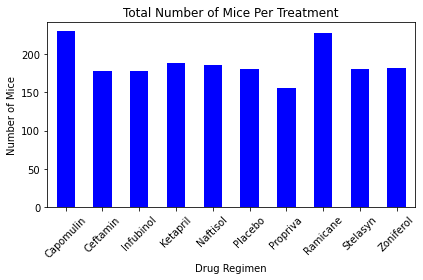

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatment_df = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

treatment_df.plot(kind = "bar", color = 'b', rot=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Number of Mice Per Treatment")
plt.tight_layout()
plt.show()

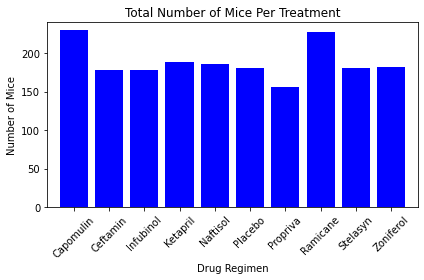

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatment_list = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"].tolist()
# regimen_list = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
regimen_list = ss2_df.index
x_axis = np.arange(len(treatment_df))
plt.bar(x_axis, treatment_list, color='b', align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_list, rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(treatment_list)+10)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Number of Mice Per Treatment")
plt.tight_layout()
plt.show()

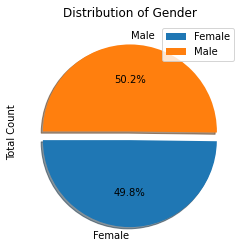

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df.groupby(["Mouse ID", "Sex"])
gender
gender_df = pd.DataFrame(gender.size())
mice_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total Count"]
explode = (0.1, 0)
mice_gender.plot(kind="pie", y='Total Count', explode = explode, shadow=True, autopct='%1.1f%%', startangle = 180)
plt.title("Distribution of Gender")
plt.tight_layout
plt.show()

(-1.1027019432331793,
 1.1054948118841157,
 -1.211214051424959,
 1.1082640514693718)

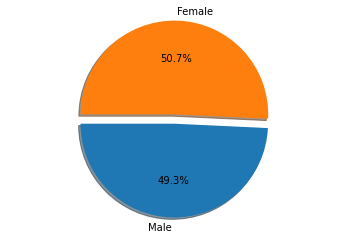

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (clean_df.groupby(["Sex"])["Mouse ID"].count()).tolist()
labels = ["Male", "Female"]
explode = (0.1,0)

plt.pie(gender_count, explode = explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_treatments_df = clean_df.loc[clean_df["Timepoint"] == 45]
four_treatments_df
# four_regimens = combined_df[combined_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# four_regimens = four_regimens.sort_values(["Timepoint"], ascending=True)
# four_regimens

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [15]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# merged_df = pd.merge(clean_df, four_treatments_df, on='Mouse ID', how='outer')
# merged_df
# cap_df = four_treatments_df[four_treatments_df["Drug Regimen"].isin(["Capomulin"])]
# ram_df = four_treatments_df[four_treatments_df["Drug Regimen"].isin(["Ramicane"])]
# inf_df = four_treatments_df[four_treatments_df["Drug Regimen"].isin(["Infubinol"])]
# cef_df = four_treatments_df[four_treatments_df["Drug Regimen"].isin(["Ceftamin"])]

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
tumor = four_treatments_df["Tumor Volume (mm3)"]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume  is: {upperq}")
print(f"The interquartile range of tumor volume s is: {iqr}")
print(f"The the median of tumor volume  is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 40.6583443125
The upper quartile of tumor volume  is: 68.8702959775
The interquartile range of tumor volume s is: 28.211951665000008
The the median of tumor volume  is: 63.53754596 
Values below -1.6595831850000096 could be outliers.
Values above 111.18822347500002 could be outliers.


In [17]:
# Locate the rows which contain mice on each drug and get the tumor volumes

cap_df = four_treatments_df[four_treatments_df["Drug Regimen"].isin(["Capomulin"])]
cap_tumor_value = cap_df["Tumor Volume (mm3)"]
print(cap_tumor_value)
print("----------")
ram_df = four_treatments_df[four_treatments_df["Drug Regimen"].isin(["Ramicane"])]
ram_df_value = ram_df["Tumor Volume (mm3)"]
print(ram_df_value)
print("----------")
inf_df = four_treatments_df[four_treatments_df["Drug Regimen"].isin(["Infubinol"])]
inf_df_value = inf_df["Tumor Volume (mm3)"]
print(inf_df_value)
print("----------")
cef_df = four_treatments_df[four_treatments_df["Drug Regimen"].isin(["Ceftamin"])]
cef_df_value = cef_df["Tumor Volume (mm3)"]
print(cef_df_value)
print("----------")

# add subset 
    
    
# Determine outliers using upper and lower bounds
    

19     23.343598
29     28.484033
39     28.430964
104    31.023923
124    31.896238
134    32.377357
144    33.329098
164    34.455298
204    37.311846
224    36.041047
244    37.074024
282    38.846876
299    38.939633
309    38.982878
337    38.125164
350    40.658124
360    40.159220
370    40.728578
380    41.483008
390    41.581521
440    47.685963
Name: Tumor Volume (mm3), dtype: float64
----------
9      22.050126
49     29.128472
59     30.276232
74     30.564625
84     30.638696
94     31.560470
114    31.095335
154    33.397653
174    32.978522
184    33.562402
194    36.134852
214    38.810366
234    37.225650
254    36.374510
272    37.311236
327    38.407618
400    40.659006
410    40.667713
420    45.220869
430    43.047543
Name: Tumor Volume (mm3), dtype: float64
----------
463     67.973419
473     65.525743
540     66.083066
637     72.226731
800     62.435404
834     60.918767
1053    66.196912
1813    67.685569
1872    62.754451
Name: Tumor Volume (mm3), dtype: floa

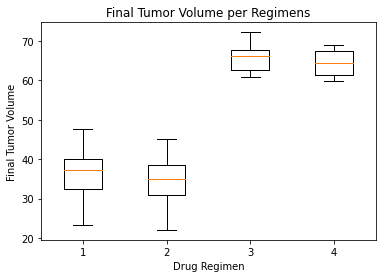

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume per Regimens')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot([cap_tumor_value, ram_df_value, inf_df_value, cef_df_value ])
plt.show()

## Line and Scatter Plots

[ 0  5 10 15 20 25 30 35 40 45]
     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1452     r157    Capomulin    Male          22          25          0   
1453     r157    Capomulin    Male          22          25          5   
1454     r157    Capomulin    Male          22          25         10   
1455     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
1

ValueError: x and y must have same first dimension, but have shapes (10,) and (230,)

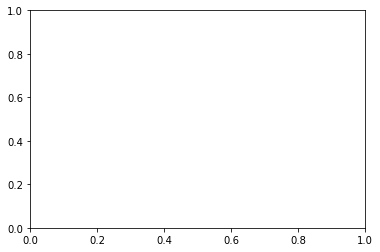

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
print(x_axis)
cap_mice = clean_df[clean_df["Drug Regimen"].isin(["Capomulin"])]
print(cap_mice)
cap_mice_time = cap_mice["Timepoint"]
plt.plot(x_axis, cap_mice_time)
plt.show()

In [ ]:
cap_df

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# avg_tumor_volume = four_treatments_df["Tumor Volume (mm3)"].mean()
# print(avg_tumor_volume)
# mouse_weight = four_treatments_df["Weight (g)"]
# print(mouse_weight)
plt.scatter(cap_df.iloc[:,4],cap_df.iloc[:,6])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = clean_df.iloc[:,4]
tumor_volume = clean_df.iloc[:,6]
correlation = st.pearsonr(mouse_weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
x_values = clean_df.iloc[:,4]
y_values = clean_df.iloc[:,6]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(23,30),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
print(f"The r-squared is: {rvalue**2}")